In [17]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
import time
import pandas as pd
from itertools import count
from IPython import display

import seaborn as sns
from IPython.display import HTML
from scipy.io import loadmat
from operator_functions.pointer_func import pointer_vector
from operator_functions.Laplace_operator import LaplaceOpt_Aq,uBC_Laplace1,b_vector_creator
from operator_functions.Conjugate_gradient import CG_solver
from operator_functions.bound_append import bound_appender

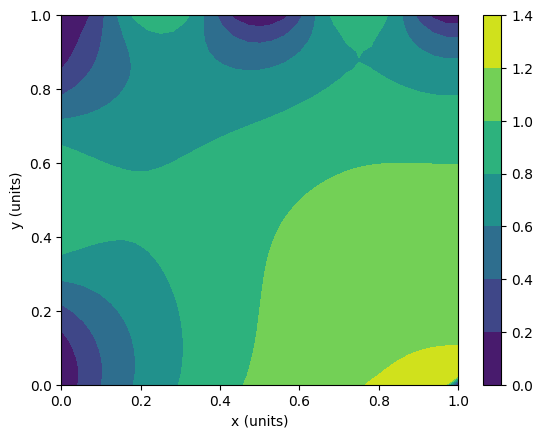

In [26]:
##diffusivity
alpha  = 0.005 ;
## Delta t
dt = 0.02 ;
## grid
Nx=31
Ny=40
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 
xv, yv = np.meshgrid(x, y, indexing='ij')
X,Y=np.meshgrid(xtotal, ytotal, indexing='ij')
kappa=0.02*np.exp(-((((xv-0.7)**2)/0.09)+(((yv-0.6)**2)/0.25)))
b=kappa/(alpha)
Q=np.zeros((Nx*Ny,1))
BCB=(-0.3)*np.ones(Nx)
BCL=0.5-0.5*np.cos(2*np.pi*y)
BCT=0.5+0.5*np.sin(4*np.pi*x-0.5*np.pi)
BCR=np.zeros(Ny)
Q,Solution_Matrix,b_residual=CG_solver(Q,b,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR,100)
BCBt=(Solution_Matrix[:,0]-1*dx*(-1*0.3))
BCLt=0.5-0.5*np.cos(2*np.pi*ytotal)
BCTt=0.5+0.5*np.sin((4*np.pi*xtotal)-(0.5*np.pi))
BCRt=Solution_Matrix[-1,:]
Final_matrix=bound_appender(Solution_Matrix,Nx, Ny,BCBt,BCLt,BCTt,BCRt)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Final_matrix)
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [28]:
def func_new(xnew):
    b_vector=b_vector_creator(b,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR)
    d_old=b_vector-LaplaceOpt_Aq(xnew,Nx,Ny,dx,dy)
    return d_old

In [29]:
Q=root(func_new, np.zeros((Nx*Ny,1)), method='df-sane').x

In [30]:
Q

array([[0.10019829],
       [0.10798121],
       [0.12753245],
       ...,
       [0.34025831],
       [0.27385556],
       [0.17770757]])

In [27]:
Q

array([[0.14988562],
       [0.15761418],
       [0.17705278],
       ...,
       [0.45840278],
       [0.3527706 ],
       [0.21721471]])

In [ ]:
def timer_iteration(dt):
    Q=np.zeros((Nx*Ny,1))
    norm_list=[]
    b_vector=b_vector_creator(kappa,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR,dt,alpha)
    b=A_operator(Q,Nx,Ny,dx,dy,dt,alpha)+b_vector
    for it in range(100):
        Q=root(func_new, np.zeros((Nx*Ny,1)), method='df-sane',args=(Q)).x
        norm_l2 = (norm(Q-Steady_ss))/(norm(Steady_ss))
        if it%10==0:
            print(it*dt,norm_l2)
        norm_list.append(norm_l2)
        if norm_l2<1e-4:
            break
        if it>3:
            if (norm_list[-1]-norm_list[-2])>0:
                break
    return Q,norm_list

In [ ]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, Solution_Matrix)
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, b/(1))
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, kappa/(1))
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
b.shape

In [ ]:
Nx=4
Ny=3
N=Nx*Ny
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 

In [ ]:
matrix=[]
for i in range(N):
    Q=np.zeros((N,1))
    Q[i,0]=1
    matrix.append(list(LaplaceOpt_Aq(Q,Nx,Ny,dx,dy)[:,0]))
matrx_data=pd.DataFrame(np.array(matrix))
matrx_data.columns=[i for i in matrx_data.columns]
matrx_data.index=[i for i in matrx_data.index]
inverted_matrix=np.linalg.inv(np.array(matrix))
matrix_inverse=pd.DataFrame(inverted_matrix)
matrix_inverse.columns=[i for i in matrix_inverse.columns]
matrix_inverse.index=[i for i in matrix_inverse.index]



In [ ]:
matrx_data

In [ ]:
inverted_vector=inverted_matrix@(b_vector_creator(b,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR))
inverted_vector_Matrix=np.zeros((Nx,Ny))
k=0
for i in range(Nx):
    for j in range(Ny):
        inverted_vector_Matrix[i,j]=inverted_vector[k]
        k=k+1
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, inverted_vector_Matrix)
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
2/(dy**2)

In [ ]:
iQ=pointer_vector(Nx, Ny)
pointer_mapping_visual=pd.DataFrame(pointer_vector(Nx, Ny))
pointer_mapping_visual.columns=[f"x={i}" for i in pointer_mapping_visual.columns]
pointer_mapping_visual.index=[f"y={len(pointer_mapping_visual.index)-(i+1)}" for i in pointer_mapping_visual.index]

In [ ]:
pointer_mapping_visual

In [ ]:
pointer_mapping_actual=pd.DataFrame((pointer_vector(Nx, Ny)).T)
pointer_mapping_actual.columns=[f"i={i}" for i in pointer_mapping_actual.columns]
pointer_mapping_actual.index=[f"j={i}" for i in pointer_mapping_actual.index]

In [ ]:
pointer_mapping_actual

In [ ]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, Solution_Matrix)
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
q=pd.DataFrame(np.flipud((Solution_Matrix.T)))
q.columns=[f"i={i+1}" for i in q.columns]
q.index=[f"j={len(q.index)-i}" for i in q.index]

In [ ]:
uBC_Vector=uBC_Laplace(Nx,Ny,dx,dy,BCB,BCL,BCT,BCR)
uBC_Vector_Matrix=np.zeros((Nx,Ny))
k=0
for i in range(Nx):
    for j in range(Ny):
        uBC_Vector_Matrix[i,j]=uBC_Vector[k]
        k=k+1



In [ ]:
pd.DataFrame(np.flipud(uBC_Vector_Matrix.T))

In [ ]:
np.sqrt(0.05)

In [ ]:
1/(20)

In [ ]:
BCL

In [ ]:
BCR

In [ ]:
BCB

In [ ]:
BCT